# Predict the Odds of Absenteeism during Work Hours

This project applies Logistic Regression model to predict Absenteeism at a company. The original dataset can be accessed from the [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work).
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

Some key terms before we start the project:

**What is Absenteeism? :** The hours of absence from work, during normal working hours which results in temporary incapacity to execute regular work activity, there by reduces the company's productivity. For this project it has been classified into two:
- moderate absence
- excessive absence

**Why create a model to predict Absenteeism? :** The company management wants to explore and identify the possibility that, an employee exhibiting certain characteristics, can be expected to be away from work at some point in time or not. 

**What has been considered as useful factors for prediction?** 

- distance between employee residence and company
- transportation expenses (fuel costs, parking charges etc.)
- the no. of children or pets an employee has
- education qualifications of the employee
- reasons cited by employees for their absence
- average work load per day metrics ........and several other features

**Project specific context:** The objectives of this project include:
- to create a simple logistic regression model that can predict absenteesim 
<p><font color = "DarkBlue">(model has not been cross validated, this iteration is just to create and test)</font></p>
- to apply an evaluation technique to assess the model's performance

###  #Spoiler Alert! Project Conclusion

<div class="alert alert-block alert-success"> We have tried and tested a logistic regression model to predict absenteeism during work hours. The model appears to have a moderate predictive power. We neither claim nor deny it will succeed or fail to give correct predictions of an employee's absenteeism at this point. <br>

We will have to subject the model to further validations in order to rule out (or rule in), it's applicability for the company management's objective. For a better assessment, we will also try to compare a Random Forest model perfomance on this dataset (this would be the next part/extension of this project. Not included here).</div>

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# magic line
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", font_scale = 1.2)

# color palette used is colorblind
sns.set_palette("colorblind")

## Read and Explore Dataset

In [2]:
raw_data = pd.read_csv("Absenteeism_at_work.csv", sep = ";")

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

### Descriptive statistics about Dataset

In [4]:
pd.options.display.max_columns = 25

print("Descriptive stats table shape:", raw_data.describe().shape)

raw_data.describe()

Descriptive stats table shape: (8, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Great! the dataset does not contain any null values. Few columns to highlight: 

- <u>Disciplinary failure, Social drinker</u> and <u>Social smoker</u> columns show classified data - 0 and 1. If they have some real impact on the hours of absence, we can expect to observe segregation of hours into two groups. 

- <u>Education, Son</u> and <u>Pet</u> columns represent - educational qualification, no. of children and no. of pets an employee has, respectively. These columns provide categorical ordinal data.

- The columns Son and Pet are important, if we can establish that an employee may be missing work hours if, for example: they have to take/drop kids and/ or pets at hospital/ day care center or school etc., which might explain some of the missing hours. 


- The <u>ID column</u> is an identifier of an employee. We will not consider this column for the analysis. Few reasons being:
    - It's an employee code and can only help identify an employee in the dataset.
    - The dataset was collected in a span of 3 years, so even if, we want to assess which employee has shown consistent excessive absence, we will need access to a lot more information of an employee - such as their joining date or duration of employement

### Remove Duplicate Records

For removing duplicate records we have considered all the columns and not a subset of the dataset.

In [5]:
# No. of duplicate records in dataset - subset is default all fields
print("Total duplicate rows:", raw_data[raw_data.duplicated()].shape)

# drop the duplicate rows, keep only the first occurance
no_duplicate_data = raw_data.drop_duplicates(ignore_index = True)
print("Non duplicate rows:", no_duplicate_data.shape)

Total duplicate rows: (34, 21)
Non duplicate rows: (706, 21)


In [6]:
no_duplicate_data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
# strip extra spaces from column names
no_duplicate_data.columns = no_duplicate_data.columns.str.strip()

## The Target - Absenteeism Time in Hours

In order to predict the probability of an employee exhibiting certain characteristics, being absent during work hours, we need a variable in the dataset that can represent this information. The column that contains information about this is `Absenteeism Time in Hours` for each employee record. 

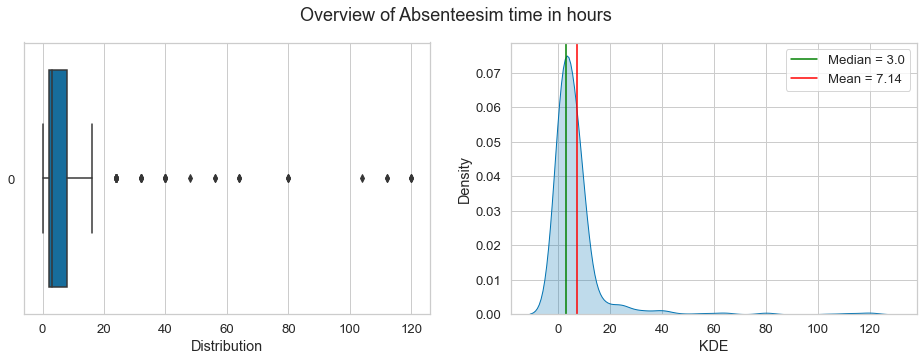

In [8]:
fig, ax = plt.subplots(figsize = (16, 5), ncols = 2)

# boxplot
sns.boxplot(data = no_duplicate_data["Absenteeism time in hours"], orient = "h", ax = ax[0])
ax[0].set_xlabel("Distribution")

# kde plot
sns.kdeplot(data = no_duplicate_data, x = "Absenteeism time in hours", shade = True, ax = ax[1])

# median line
ax[1].axvline(no_duplicate_data["Absenteeism time in hours"].median(), color = "Green", 
              label = ("Median = {}".format(no_duplicate_data["Absenteeism time in hours"].median())))

# mean line
ax[1].axvline(no_duplicate_data["Absenteeism time in hours"].mean(), color = "Red",
              label = ("Mean = {:.2f}".format(no_duplicate_data["Absenteeism time in hours"].mean())))
ax[1].set_xlabel("KDE")

plt.suptitle("Overview of Absenteesim time in hours", fontsize = 18)
plt.legend()
plt.show()

In [9]:
# absenteeism value counts in 10 bins
no_duplicate_data["Absenteeism time in hours"].value_counts(bins = 10, sort = False)

(-0.121, 12.0]    643
(12.0, 24.0]       35
(24.0, 36.0]        6
(36.0, 48.0]        8
(48.0, 60.0]        2
(60.0, 72.0]        3
(72.0, 84.0]        3
(84.0, 96.0]        0
(96.0, 108.0]       1
(108.0, 120.0]      5
Name: Absenteeism time in hours, dtype: int64

This dataset is quite interesting! 

We have certain employees showing 0 hours of absence, as well as, some employees show absence for more than 100 hours for a given day! The challenge with the records having 100 hours of absence, is that, the dataset was created with data from July 2007 to July 2010. And data dictionary doesn't help us much to understand how the hours were calculated. 

<div class="alert alert-block alert-warning"> <b>You may skip to read this part or Please read and help me understand why this could be a good or bad approach:</b>
        
Initially I considered discarding all the rows which have more than 40 hours. The logic was: 
- In a year we have 7 months which have 31 days i.e. maximum number of days possible in a month. 
    
- Each of these months will have only 3 weekdays (Monday, Tuesday, Friday etc.) which can repeat maximum of 5 times.

- Assuming the number of work hours per day is 8, the maximum hours an employee can be absent for a particular weekday in a given month can be max: **5 * 8 = 40**
    
- As per the data dictonary, column **Day of the week** substitutes a number between 2 and 6 (both inclusive) for each of the weekdays - Monday to Friday.
    
But it struck me during the analysis, that what if this data is not wrong, and may have some reason/ logic behind it. More over these records are less than 3% of the total rows available in the dataset. So I chose to keep them for the analysis. 

</div>

For now, let's continue with the data as is, i.e. no outliers have been considered.

<b>The median for the target column is 3.0  - How can we use this information?</b>

The objective of this project is not to predict the number of hours an employee might remain absent from the work hours. Instead, we want to focus on the probability of an employee's absence. In order to do so, we need to convert the number of hours into a binary form such that ***True/ Yes/ 1*** represent probability of absence and ***False/ No/ 0*** will show otherwise.

Since the median is 3, we can segregate the Absenteeism time in hours column as: 
- **0 to represent moderate** absence during working hours: when no. hours of absence is < 3 and
- **1 to represent excessive** absence during working hours: when no. hours of absence is >= 3 

In [10]:
# subset of records having more than 40 hrs of absence
# no_duplicate_data.loc[no_duplicate_data["Absenteeism time in hours"] > 40, 
#                       ["ID", "Reason for absence", "Month of absence", "Day of the week", "Seasons"]].sort_values("ID")

# subset of records having more than 40 hrs of absence in percentage of total rows
print("% of rows with hours of absence higher than 40 :",
      no_duplicate_data.loc[no_duplicate_data["Absenteeism time in hours"] > 40].shape[0]/no_duplicate_data.shape[0])

% of rows with hours of absence higher than 40 : 0.021246458923512748


In [11]:
# to avoid warning
non_pre_processed_data = no_duplicate_data.copy()

# absence median 
absence_median = non_pre_processed_data["Absenteeism time in hours"].median()

# absenteeism hours conversion to binary - 0 (Not excessive) and 1 (Excessive)
absence_target = np.where(non_pre_processed_data["Absenteeism time in hours"] > absence_median, 1, 0)

# binary column added back to non processed dataset
non_pre_processed_data["Excessive absenteeism"] = absence_target

## Overview of dataset by Correlation Matrix

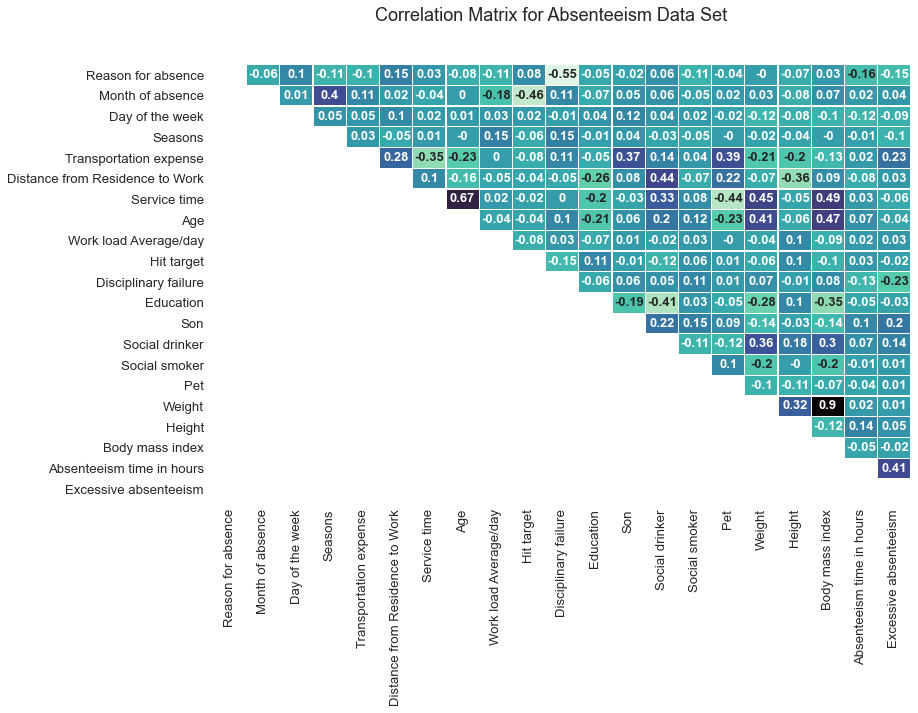

In [12]:
# correlation matrix for whole dataset - exclude ID column
corr = non_pre_processed_data.drop(columns = "ID").corr()

# to mask the lower right half matrix 
mask_array = np.tril(corr)

# plot correlation matrix as seaborn heatmap
fig, ax = plt.subplots(figsize = (12.5, 8))
sns.heatmap(data = corr, cbar = False, linewidths = 0.2, cmap = "mako_r", 
            mask = mask_array, annot = corr.round(2), annot_kws = {"fontsize": 13, "fontweight" : "bold"})

plt.suptitle("Correlation Matrix for Absenteeism Data Set", fontsize = 18)
plt.show()

Based on the correlation matrix:

- Most features do not have a strong correlation with Absenteeism 
- Age and Service time show high positive correlation
- Service Time also show a weak-moderate correlation with Weight and BMI
- Hit target and Work load Average/ day have almost no correlation with Absenteeism
- Social drinking and smoking habits also show a weak correlation if at all with Absenteeism
- No surprise! Weight and Body Mass Index are highly correlated

So how do we proceed from here? Let's first cleanup some of the correlated columns and not so useful columns.

### Data Cleanup1

In [13]:
# drop ID and multicollinear causing columns
drop_cols1 = ["ID", "Month of absence", "Seasons", "Service time", "Weight", "Height"]

# checkpoint - non_pre_processed_data to pre_processed_data
non_processed_data = non_pre_processed_data.drop(drop_cols1, axis = 1)
non_processed_data.shape

(706, 16)

## Data Preprocessing

### Features -  Disciplinary Failure, Social drinker, Social smoker

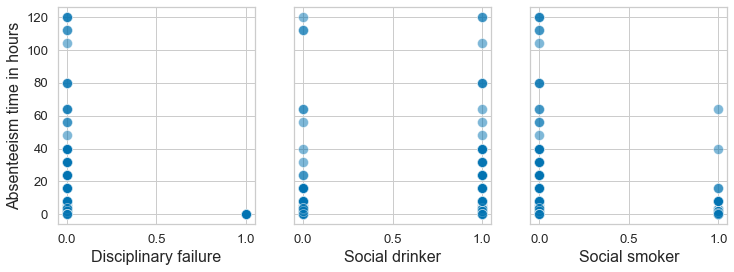

In [14]:
# to create multiple plots using loop 
x_cols = ["Disciplinary failure", "Social drinker", "Social smoker"]
y_col = "Absenteeism time in hours"

fig, ax = plt.subplots(figsize = (12, 4), ncols = 3, sharey = True)

# plot feature vs. absenteeism
for i in range(3):
    sns.scatterplot(x = non_processed_data[x_cols[i]], y = non_processed_data[y_col], ax = ax[i], s = 100, alpha = 0.5)
    ax[i].set_ylabel(ax[i].get_ylabel(), fontsize = 16)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontsize = 16)
    
plt.show()

### Features - Education, Children (renamed column 'Son') and Pets (renamed column 'Pet')

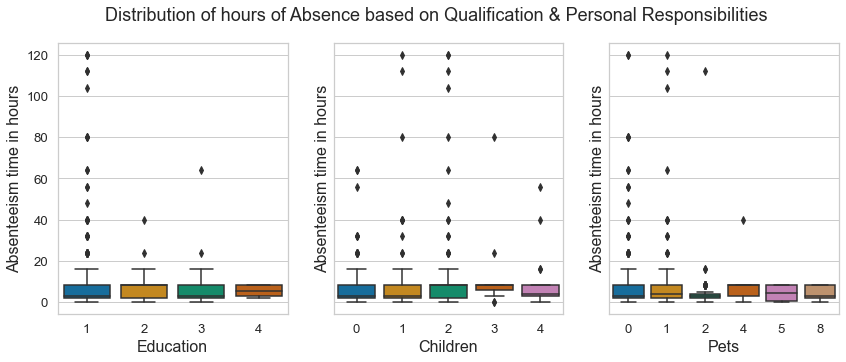

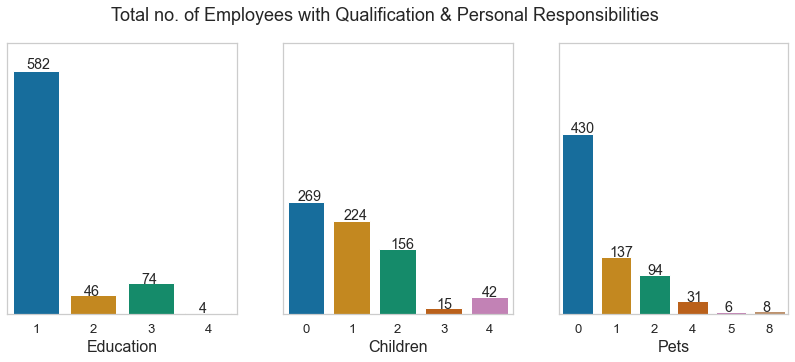

In [15]:
# to avoid copy warning
non_processed_data = non_processed_data.copy()

# rename columns
non_processed_data.rename(columns = {"Son" : "Children", "Pet" : "Pets"}, inplace = True)

x_cols = ["Education", "Children", "Pets"]
y_col = "Absenteeism time in hours"

# boxplot of features
fig, ax = plt.subplots(figsize = (14, 5), ncols = 3, sharey = True)

for i in range(3):
    sns.boxplot(x = non_processed_data[x_cols[i]], y = non_processed_data[y_col], ax = ax[i])                 
    ax[i].set_ylabel(ax[i].get_ylabel(), fontsize = 16)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontsize = 16)

plt.suptitle("Distribution of hours of Absence based on Qualification & Personal Responsibilities", fontsize = 18)
plt.show()
    
# plot features vs. absenteeism hours
fig, ax = plt.subplots(figsize = (14, 5), ncols = 3, sharey = True)

for i in range(3):
    temp_df = non_processed_data.groupby(x_cols[i], as_index = False)[y_col].count()
    
    sns.barplot(x = temp_df[x_cols[i]], y = temp_df[y_col], ax = ax[i])                 
    
    ax[i].set_ylabel("")
    ax[i].set_yticks([])
    ax[i].set_xlabel(ax[i].get_xlabel(), fontsize = 16)
    
    if i == 0:
        ax[i].set_ylim(None, 650)
    
    for p in ax[i].patches:
        ax[i].annotate(s = int(p.get_height()), xy = (p.get_x() + p.get_width() / 3.5, p.get_height() * 1.01))
    
plt.suptitle("Total no. of Employees with Qualification & Personal Responsibilities",  fontsize = 18)
plt.show()

Based on the above analysis we can conclude: 

- absence is unrelated to drinking, smoking or any disciplinary action
- higher number of children and pets do not impact absenteeism much
- a very large number of employees are high-schoolers - thus we can reduce the education column to binary format as well: 
    - 0 to represent employees who have only attended/ completed high school
    - 1 to represent employees who are graduates or post graduates or masters/ doctrate holders 

In [16]:
# classify employees as high schoolers or graduates and above
non_processed_data["Education"] = non_processed_data["Education"].apply(lambda e: 0 if e == 1 else 1)
non_processed_data["Education"].value_counts()

0    582
1    124
Name: Education, dtype: int64

## Time to poke the elephant in the room!

Now we come to the most important feature - the reason cited by an employee for their absence during work hours.

As the data dictionary describes, there are 28 different codes to represent various reasons for an employee absence (listed below), <u>we can assume that:</u>

- If no reason is given i.e. Reason for absence = 0, then the employee must be present for all work hours and absenteeism hours must also be 0.
- Only one reason per record should be available, i.e. an employee was away from work for one particular reason only for a given day, month and year.

We have already filtered out complete duplicate records. The records which have <u>same ID, Month, Day, Season and Reason of absence, but vary for the other features such as Hit target or Work load Average/day,</u> ***have not been considered as duplicates***, as the data was collected between year 2015 and 2018, with no column suggesting which year the data was collected for. Hence we are working with these rows as is.

### Feature - Reason for absence

|Reason for absence Code| Reason for absence Description|
| --- | ---|
|1	|Certain infectious and parasitic diseases  
|2	|Neoplasms  |
|3	|Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  |
|4	|Endocrine, nutritional and metabolic diseases  |
|5	|Mental and behavioural disorders  |
|6	|Diseases of the nervous system  |
|7	|Diseases of the eye and adnexa  |
|8	|Diseases of the ear and mastoid process  |
|9	|Diseases of the circulatory system  |
|10	|Diseases of the respiratory system  |
|11	|Diseases of the digestive system  |
|12	|Diseases of the skin and subcutaneous tissue  |
|13	|Diseases of the musculoskeletal system and connective tissue  |
|14	|Diseases of the genitourinary system  |
|15	|Pregnancy, childbirth and the puerperium  |
|16	|Certain conditions originating in the perinatal period  |
|17	|Congenital malformations, deformations and chromosomal abnormalities |
|18	|Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified|
|19	|Injury, poisoning and certain other consequences of external causes|
|20	|External causes of morbidity and mortality|
|21	|Factors influencing health status and contact with health services|
|22	|Patient follow-up|
|23	|Medical consultation|
|24	|Blood donation|
|25	|Laboratory examination|
|26	|Unjustified absence|
|27	|Physiotherapy|
|28	|Dental consultation|

In [17]:
# This section is a helper section to create visualizations based on Reasons for absence
reasons = pd.read_csv("Reason_for_absence.csv")

# temp df with reason descriptions appended
reason_absence_df = pd.merge(left = non_processed_data[["Reason for absence", "Absenteeism time in hours"]], 
                             right = reasons, 
                             how = "left", on = "Reason for absence", )

# fill None values i.e. description for Reason 0 with "No Reason"
reason_absence_df["Reason for absence Description"].fillna("No Reason", inplace = True)

reason_absence_df.tail()

,Reason for absence,Absenteeism time in hours,Reason for absence Description
701,14,8,Diseases of the genitourinary system
702,11,4,Diseases of the digestive system
703,0,0,No Reason
704,0,0,No Reason
705,0,0,No Reason


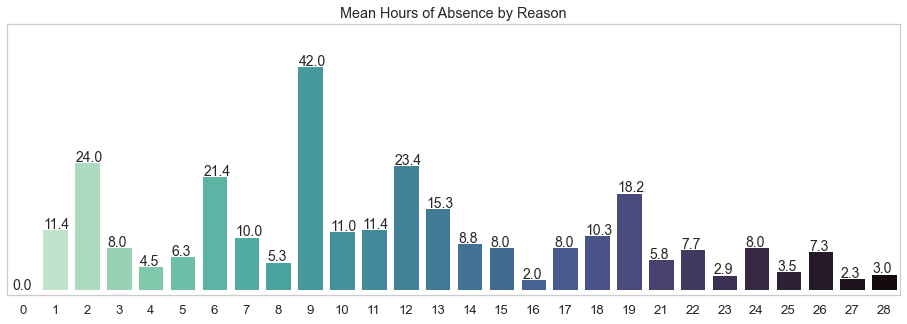

In [18]:
# calculate mean no. of hours of absence per reason code
temp_df = reason_absence_df.groupby("Reason for absence", as_index = False)["Absenteeism time in hours"].mean()

# plot for each reason vs. mean no. of absence hours
fig, ax = plt.subplots(figsize = (16, 5))
sns.barplot(x = temp_df["Reason for absence"], y = temp_df["Absenteeism time in hours"], palette = "mako_r")

# adding annotations
for p in ax.patches:
    ax.annotate(s = "{:.1f}".format(p.get_height()), xy = (p.get_x() + 0.05 , p.get_height() + 0.2), 
                fontsize = 14)

ax.set_ylabel("")
ax.set_yticks([])
ax.set_ylim(-1, 50)

ax.set_xlabel("")
ax.set_title("Mean Hours of Absence by Reason")

plt.show()

So our first assumption, that no reason given means no employee was absent during work hours for a particular day has checked out as the mean hours of absence is 0. 

**We have a missing data alert here as Reason code = 20, is not available in the dataset!**

One value that stand out from this column is Reason Code 26. It means "Unjustified Absence". We can interpret it as, employee took some hours off, but didn't respond with a valid reason. This value can be treated as baseline for other reasons. We will remove this column to avoid multicollinearity issues.

If we observe each of the reasons provided, we can see that they can be grouped or classified into 4 classes: 

|Reason Code| Possible Classification |
| --- | --- |
|Reason 1 to 14 | Are related to diseases and disorders|
|Reason 15 to 17 | Are related to maternity|
|Reason 18, 19 & 21 | Are related to external factors such as injuries|
|Reason 22 to 25, 27 & 28 | Are related to routine/ regular checkups/ consultation or unclassified such as blood donations| 

The reason code = 26 belongs to the group 4, however we will not take this column in the model. Let's obtain the dummies for Reason of absence feature and classify it into groups.

In [19]:
# col_list = ["ID", "Reason for absence", "Month of absence", "Seasons",
#                         "Day of the week", "Seasons", "Absenteeism time in hours"]

# non_pre_processed_data[non_pre_processed_data[col_list].duplicated(keep = False)].sort_values(col_list)

# get dummies
reason_dummies = pd.get_dummies(non_processed_data["Reason for absence"])

# remove columns 0 and 26 - No reason and Unspecified
n_minus_1_dummies = reason_dummies.drop(columns = [0, 26])

# classifying reasons by qualitative assessment
reason_disease = n_minus_1_dummies.iloc[:, :15].max(axis = 1)
reason_maternity = n_minus_1_dummies.iloc[:, 15:18].max(axis = 1)
reason_injury = n_minus_1_dummies.iloc[:, 18:21].max(axis = 1)
reason_other = n_minus_1_dummies.iloc[:, 22:].max(axis = 1)

# checkpoint from non_processed_data to pre_processed_data 
pre_processed_data = pd.concat([non_processed_data, reason_disease, reason_maternity, 
                                reason_injury, reason_other], axis = 1)

# rename the classification output columns
pre_processed_data.rename(columns = {0: "Reason disease", 1: "Reason maternity", 
                                     2: "Reason injury", 3: "Reason other"}, inplace = True)
pre_processed_data.head()

,Reason for absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Children,Social drinker,Social smoker,Pets,Body mass index,Absenteeism time in hours,Excessive absenteeism,Reason disease,Reason maternity,Reason injury,Reason other
0,26,3,289,36,33,239.554,97,0,0,2,1,0,1,30,4,1,0,0,0,0
1,0,3,118,13,50,239.554,97,1,0,1,1,0,0,31,0,0,0,0,0,0
2,23,4,179,51,38,239.554,97,0,0,0,1,0,0,31,2,0,0,0,0,0
3,7,5,279,5,39,239.554,97,0,0,2,1,1,0,24,4,1,1,0,0,0
4,23,5,289,36,33,239.554,97,0,0,2,1,0,1,30,2,0,0,0,0,0


### Data Cleanup2

In [20]:
# drop the non-neccessary columns
drop_cols1 = ["Reason for absence", "Disciplinary failure", "Social drinker", "Social smoker"]

pre_processed_data = pre_processed_data.drop(drop_cols1, axis = 1)
pre_processed_data.shape

(706, 16)

In [21]:
# changing column sequence
column_sequence = ['Reason disease', 'Reason maternity', 'Reason injury', 'Reason other', 'Day of the week',
                   'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day',
                   'Hit target', 'Education', 'Children', 'Pets', 'Body mass index', 'Absenteeism time in hours',
                   'Excessive absenteeism']

pre_processed_data = pre_processed_data[column_sequence]

# pre_processed_data.head()

### Features - Day of the week & Hit target

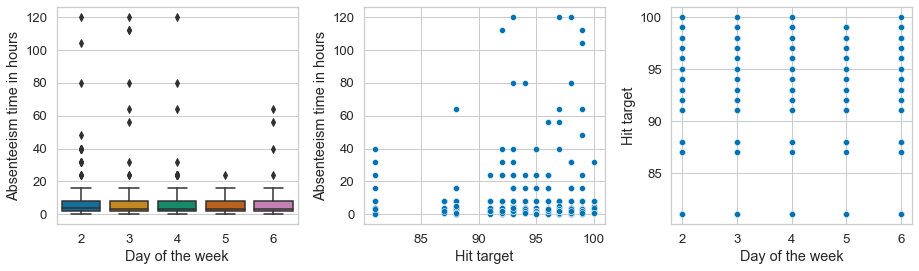

In [22]:
# plot features vs. absenteeism in hours
fig, ax = plt.subplots(figsize = (13, 4), ncols = 3)

sns.boxplot(x = pre_processed_data["Day of the week"], y = pre_processed_data["Absenteeism time in hours"], ax = ax[0])
sns.scatterplot(x = pre_processed_data["Hit target"], y = pre_processed_data["Absenteeism time in hours"], ax = ax[1])
sns.scatterplot(x = pre_processed_data["Day of the week"], y = pre_processed_data["Hit target"], ax = ax[2])

plt.tight_layout()
plt.show()

Monday blues is a universal thing indeed! 

The most common day for higher number of hours of absence is Monday. Thursday appears to be the most productive one in a week, although, the work targets are still achieved on all days of the week.

The feature Hit target apparently does not show an adverse relationship with Absenteeism. It could be that work pressure helps to complete the targets, but also make employees take some time off.

### Rest of the features

Without taking a deep dive for the rest of the features, we can say: 

| Feature | Comments/ Interpretation |
| ---     | --- |
| Distance from Residence to Work (in kilometers) | should affect the absence of employees directy as the travel time to cover the distance could be deterministic factor of absence | 
| Age | how old an employee is, should directly impact their behaviour|
| Transportation expense | we will let the model tell us how much does this column affect the absenteeism during work hours| 
| Body mass index | Since the BMI may or may not impact health related issues, we will keep this feature as well |
| Work load Average/day | this is a calculated value (we do not know the calculation for this column!). Let's assume it  provides the average amount of time an employee has worked in minutes per day. The least time is around 3.5 hours and maximum time is about 6.5 hours | 

In [23]:
print("Least work load Average/day in Hours: {:.2f}".format(pre_processed_data["Work load Average/day"].min()/60))
print("Max work load Average/day in Hours: {:.2f}".format(pre_processed_data["Work load Average/day"].max()/60))

Least work load Average/day in Hours: 3.43
Max work load Average/day in Hours: 6.31


## Obtain Processed Data

In [24]:
# exclude binary columns from scaling
exception_columns = ['Reason disease', 'Reason maternity', 'Reason injury', 'Reason other', 
                     'Education', 'Excessive absenteeism']

# checkpoint pre_processed_data to processed_data
processed_data = pre_processed_data.drop(["Absenteeism time in hours"], axis = 1)

processed_data.head()

,Reason disease,Reason maternity,Reason injury,Reason other,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Hit target,Education,Children,Pets,Body mass index,Excessive absenteeism
0,0,0,0,0,3,289,36,33,239.554,97,0,2,1,30,1
1,0,0,0,0,3,118,13,50,239.554,97,0,1,0,31,0
2,0,0,0,0,4,179,51,38,239.554,97,0,0,0,31,0
3,1,0,0,0,5,279,5,39,239.554,97,0,2,0,24,1
4,0,0,0,0,5,289,36,33,239.554,97,0,2,1,30,0


### All features are important! Let's scale them up

We are left with one last step - to scale the dataset. We will scale the continous columns such as Transportation expense, Hit target etc. so that these features do not gain higher importance because of their higher values such as 100, 200 etc. as compared to Reason features which only have binary values 0 & 1.

In [25]:
# import StandardScaler module from sklearn library
from sklearn.preprocessing import StandardScaler

# initialize scaler object
scale = StandardScaler()

# fit and transform processed data
scaled_data = scale.fit_transform(processed_data.drop(exception_columns, axis = 1))

# convert binary columns in array
binary_data = np.array(processed_data[exception_columns])

# append the scaled and binary features array
final_data = np.append(scaled_data, binary_data, axis = 1)

# sample rows from predictor array
final_data[:5]

array([[-0.62543981,  0.98181167,  0.45607236, -0.53039854, -0.82514085,
         0.64502459,  0.85067911,  0.17327909,  0.79118362,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.62543981, -1.56109994, -1.10895364,  2.06155719, -0.82514085,
         0.64502459, -0.05517225, -0.5772426 ,  1.02637336,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.07656417, -0.65397942,  1.4767415 ,  0.23194138, -0.82514085,
         0.64502459, -0.96102361, -0.5772426 ,  1.02637336,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.77856816,  0.83310339, -1.65331051,  0.38440937, -0.82514085,
         0.64502459,  0.85067911, -0.5772426 , -0.61995483,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.77856816,  0.98181167,  0.45607236, -0.53039854, -0.82514085,
         0.64502459,  0.85067911,  0.17327909, 

### Shuffle and Split the dataset

Although we converted the absenteeism hours into a binary version, we haven't yet accounted for it's distribution in that form. That is to say we do not yet know the stratification of Moderate and Excessive absence. Let's find out.

In [26]:
processed_data["Excessive absenteeism"].value_counts(normalize = True).mul(100).round(2)

0    52.12
1    47.88
Name: Excessive absenteeism, dtype: float64

So we have our dataset with 52% of employees exhibiting moderate absenteeism, and 48% of employees with excessive absence. This is not a severe imbalance of class. Neverthelesss, we will split the data set into train and test (80% & 20%), making sure the strata proportion matches that of the original dataset.

In [27]:
# import StratifiedShuffleSplit from sklearn library
from sklearn.model_selection import StratifiedShuffleSplit

# initialize stratify, shuffle and split - random state is set to 0
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)

# predictors and target
X = final_data[:, :-1]
y = final_data[:, -1]

# split method to generate indices
sss_splits = sss.split(X = X, y = y)

# divide processed data into train and test datasets
for train_idxs, test_idxs in sss_splits:    
    
    # train data 
    train_data = final_data[train_idxs]
    
    # test data
    test_data = final_data[test_idxs]

    print("Train data shape = {} | Test data shape = {}".format(train_data.shape, test_data.shape))

Train data shape = (564, 15) | Test data shape = (142, 15)


## At last we are here! Create Logistic Regression model

In [28]:
# import LogisticRegression module
from sklearn.linear_model import LogisticRegression

# initialize with default options
log_reg = LogisticRegression()

# fit the model to the training data
log_reg.fit(X = train_data[:, :-1], y = train_data[:, -1])

LogisticRegression()

### Coefficients and Odds ratios

In [29]:
# extract binary and scaled column names
binary_columns = processed_data[exception_columns[:-1]].columns.values
scaled_columns = processed_data.drop(exception_columns, axis = 1).columns.values

# create a summary dataframe
summary_df = pd.DataFrame({"Features" : np.append(scaled_columns, binary_columns), 
                           "Coefficients" : log_reg.coef_[0]})

# increase index by 1
summary_df.index = summary_df.index + 1

# add intercept at index 0
summary_df.loc[0] = ["Intercept", log_reg.intercept_[0]]

# sort summary df by index
summary_df.sort_index(inplace = True)

# calculate the odds ratio as exponential of coefficients
summary_df["Odds ratio"] = np.exp(summary_df["Coefficients"])

# display summary data frame
summary_df.sort_values(by = ["Odds ratio"], ascending = False)

,Features,Coefficients,Odds ratio
12,Reason injury,2.596299,13.414007
10,Reason disease,1.855973,6.397923
11,Reason maternity,1.805828,6.085008
2,Transportation expense,0.519876,1.681818
7,Children,0.351112,1.420647
9,Body mass index,0.148033,1.159552
3,Distance from Residence to Work,0.071595,1.074220
6,Hit target,-0.008297,0.991737
5,Work load Average/day,-0.055950,0.945587
4,Age,-0.132486,0.875915


### Applying model on Test Data

Let's apply the model to test data and see how it fared. 

In [30]:
# accuracy for training data
print("Accuracy of prediction for training data = {:.3f}".format(log_reg.score(X = train_data[:, :-1],
                                                                               y = train_data[:, -1])))

# calculate accuracy for training data
print("Accuracy of prediction for test data = {:.3f}".format(log_reg.score(X = test_data[:, :-1],
                                                                               y = test_data[:, -1])))

Accuracy of prediction for training data = 0.762
Accuracy of prediction for test data = 0.775


Well, we have a higher accuracy on the test dataset than the training dataset. But we still only have a 77% accuracy on predictions made by the model. Next, we analyze couple of metrics to assess the performance of the model.

## Model Performance Evaluation

After all that fuzz we were able to fit our model to the data. But still, the model gave false predictions for some of the employees. So how do we know, if the model was able to identify and understand the underlying logic of the data it was trained on? There are serveral ways to do this. For this project we will take the ROC curve and ROC curve AUC. 

In [31]:
# import metrics from sklearn
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

### Confusion matrix

In [32]:
# confusion matrix for test data
cm_train = confusion_matrix(y_true = train_data[:, -1],  y_pred = log_reg.predict(train_data[:, :-1]), normalize = "all")

# confusion matrix for test data
cm_test = confusion_matrix(y_true = test_data[:, -1],  y_pred = log_reg.predict(test_data[:, :-1]), normalize = "all")

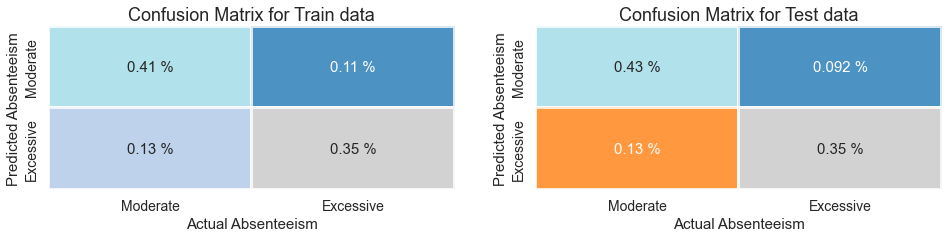

In [33]:
# Plot data
fig, ax = plt.subplots(figsize = (16, 3), ncols = 2)

cm_list = [cm_train, cm_test]
titles = ["Train", "Test"]

# plot confusion matrix for both train & test data 
for i in range(2):
    # heat
    matrix_map = sns.heatmap(cm_list[i], annot = True,
                             cmap = "tab20", cbar = False, lw = 2, alpha = 0.8,
                             annot_kws = {"fontsize" : 15},
                             xticklabels = ["Moderate", "Excessive"],
                             yticklabels = ["Moderate", "Excessive"], ax = ax[i])

    matrix_map.set_yticklabels(labels = matrix_map.get_yticklabels(), 
                               fontdict = {"fontsize": 14, "verticalalignment" : "center"})
    matrix_map.set_xticklabels(labels = matrix_map.get_xticklabels(), 
                               fontdict = {"fontsize": 14, "horizontalalignment" : "center"})

    matrix_map.set_xlabel("Actual Absenteeism", fontsize = 15)
    matrix_map.set_ylabel("Predicted Absenteeism", fontsize = 15)

    for t in matrix_map.texts:
        t.set_text(t.get_text() + " %")

    matrix_map.set_title("Confusion Matrix for {} data".format(titles[i]), fontsize = 18)

plt.show()

### ROC curve and ROC AUC Score

In [34]:
# training data predicted y score
pred_train_y_score = log_reg.decision_function(X = train_data[:, :-1])

# test data predicted y score
pred_test_y_score = log_reg.decision_function(X = test_data[:, :-1])

# train data rates and thresholds
train_fpr, train_tpr, train_thresholds = roc_curve(y_true = train_data[:, -1], y_score =  pred_train_y_score)

# test data rates and thresholds
test_fpr, test_tpr, test_thresholds = roc_curve(y_true = test_data[:, -1], y_score =  pred_test_y_score,)

# area under ROC for train data
auc_val_train = roc_auc_score(y_true = train_data[:, -1], y_score =  pred_train_y_score)

# area under ROC for test data
auc_val_test = roc_auc_score(y_true = test_data[:, -1], y_score =  pred_test_y_score)

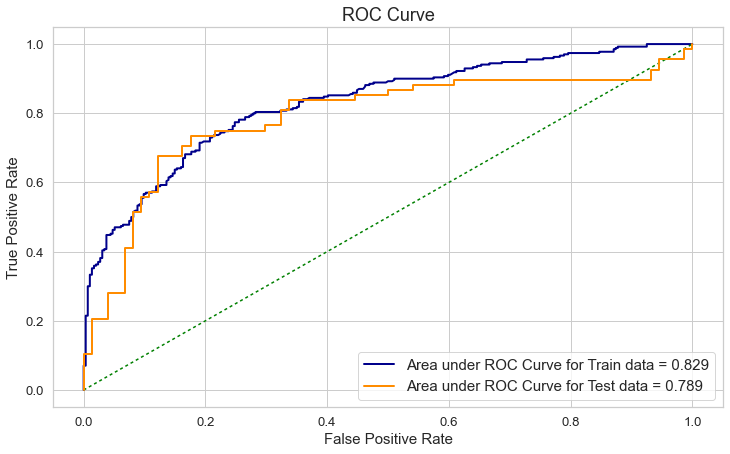

In [35]:
fig, ax = plt.subplots(figsize = (12, 7))

# plot ROC curve for train data
sns.lineplot(x = train_fpr, y = train_tpr, color = "DarkBlue", lw = 2, estimator = None, ax = ax, 
             label = "Area under ROC Curve for Train data = {:.3f}".format(auc_val_train))

# 45 degree line
sns.lineplot(x = [0, 1], y = [0, 1], color = "Green", style = True, dashes = [(2,2)], legend = False, ax = ax)

# plot ROC curve for test data
sns.lineplot(x = test_fpr, y = test_tpr, color = "DarkOrange", lw = 2, estimator = None, ax = ax, 
             label = "Area under ROC Curve for Test data = {:.3f}".format(auc_val_test))

# axis labels
ax.set_ylabel("True Positive Rate", fontsize = 15)
ax.set_xlabel("False Positive Rate", fontsize = 15)
ax.set_title(label = "ROC Curve", fontsize = 18)

# display legend
plt.legend(loc = "lower right", fontsize = 15,)

# display figure
plt.show()

#sns.color_palette("colorblind")[0]

## To Summarize

### Features

Contrary to the assumption that, the distance travelled by an employee to reach the workplace should play a major role for an employee's absence during work hours, the pre-dominant features to effectively assess absenteeism are:
- Injury
- Sickness/ disease and
- Maternity related issues. 

Transportation expenses, number of children and pets an employee has and routine checkups/ consultation visits, also impact employees presence and absence during work hours to a certain extent. 

The features that do not help in assessing absenteeism are: 
- Distance from Residence to Work
- Hit target
- Work load Average/day

An employee's BMI, educational qualifications and age also play a small role to help predict absenteeism.

### Model

The model predicted 13% False Positives during both training and testing. That is to say, these employees were predicted to show excessive absenteeism, however, in reality the absence was moderate. 

The ROC curve area is also **higher for the training data as compared to test data**. We can neither conclude nor rule out overfitting of the model, as we haven't done any cross validations. This will be our next step! 

We can try cleaning the dataset some more - remove the features that do not have an impact at all or make a very small difference to predictions. We are already restricted by the number of records in dataset, so we can experiment if exclusion of these features impacts the model performance positively. 

We can try to establish a better understanding of categorical features with each other and the target data. 

We will subject the model to cross validation. If the performance of the model doesn't or can't be improved, we will have to look for other types of models instead of Logistic Regression such as Random Forest.